In [13]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

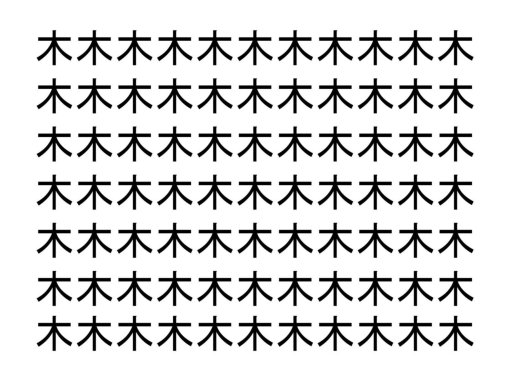

In [20]:
img1 = cv2.imread("./img/pic1.jpg", cv2.IMREAD_GRAYSCALE)

# GBRの順番になっているので、matplotlibで表示するためにはRGBの順番にする必要がある
plt.axis("off")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

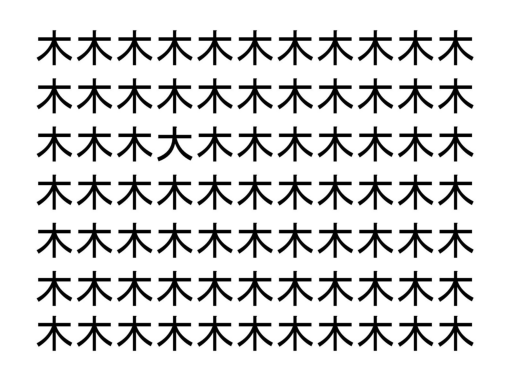

In [21]:
img2 = cv2.imread("./img/pic2.jpg", cv2.IMREAD_GRAYSCALE)

# GBRの順番になっているので、matplotlibで表示するためにはRGBの順番にする必要がある
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
print(img1.shape)
print(img2.shape)

(1153, 1526)
(1153, 1526)


In [27]:
# uint8配列 → float32配列
def tofloat32(img):
    return (img/255.).astype(np.float32)

# float32配列 → uint8配列
def touint8(img):
    return np.clip(img*255, a_min = 0, a_max = 255).astype(np.uint8)

In [28]:
# 変更がある箇所を示すmask, mask_negaを作る
sub = cv2.absdiff(img2, img1)
_, diff = cv2.threshold(sub, 0, 255, cv2.THRESH_BINARY)
diff_c = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
mask = tofloat32(diff_c)
diff_nega = cv2.bitwise_not(diff)
diff_nega_c = cv2.cvtColor(diff_nega, cv2.COLOR_GRAY2BGR)
mask_nega = tofloat32(diff_nega_c)

# 入力画像を赤、青に着色
maxs = np.full(img1.shape, 255, dtype=np.uint8)
img1_c = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
img1_c_f = tofloat32(img1_c)
img1_r = np.dstack((img1, img1, maxs))
img1_r_f = tofloat32(img1_r)
img2_b = np.dstack((maxs, img2, img2))
img2_b_f = tofloat32(img2_b)

# 変更がある箇所は乗算、ない箇所はそのままにする
multiply = cv2.multiply(img1_r_f, img2_b_f)
multiply_m = cv2.multiply(multiply, mask)
unchanged = cv2.multiply(img1_c_f, mask_nega)

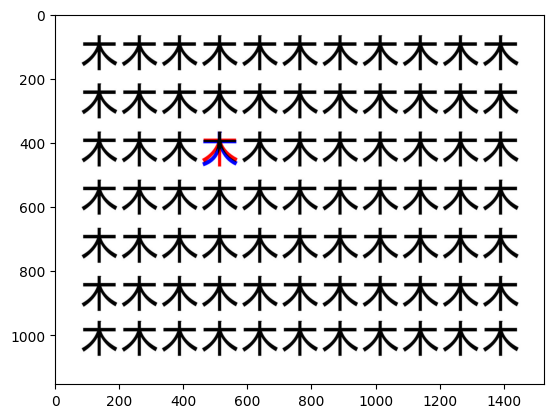

In [36]:
diff_img = touint8(multiply_m + unchanged)
plt.imshow(cv2.cvtColor(diff_img, cv2.COLOR_BGR2RGB))
plt.show()